# Part 1 - Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
logins = pd.read_json('logins.json')
logins.sort_values(by='login_time', ascending=False).head()

,login_time
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23
93139,1970-04-13 18:54:02
93137,1970-04-13 18:50:19
93136,1970-04-13 18:48:52


In [3]:
logins.shape

(93142, 1)

In [4]:
logins['interval_15min'] = logins.login_time.dt.floor('15Min')
logins_15mins = logins.groupby('interval_15min').count()
logins_15mins.rename({'login_time': 'count'}, axis=1, inplace=True)
logins_15mins.sort_values(by='count')

,count
interval_15min,
1970-01-26 05:30:00,1
1970-04-07 07:30:00,1
1970-04-07 07:15:00,1
1970-01-07 03:30:00,1
1970-04-07 06:15:00,1
...,...
1970-04-01 23:30:00,60
1970-04-04 01:15:00,63
1970-04-04 01:30:00,64


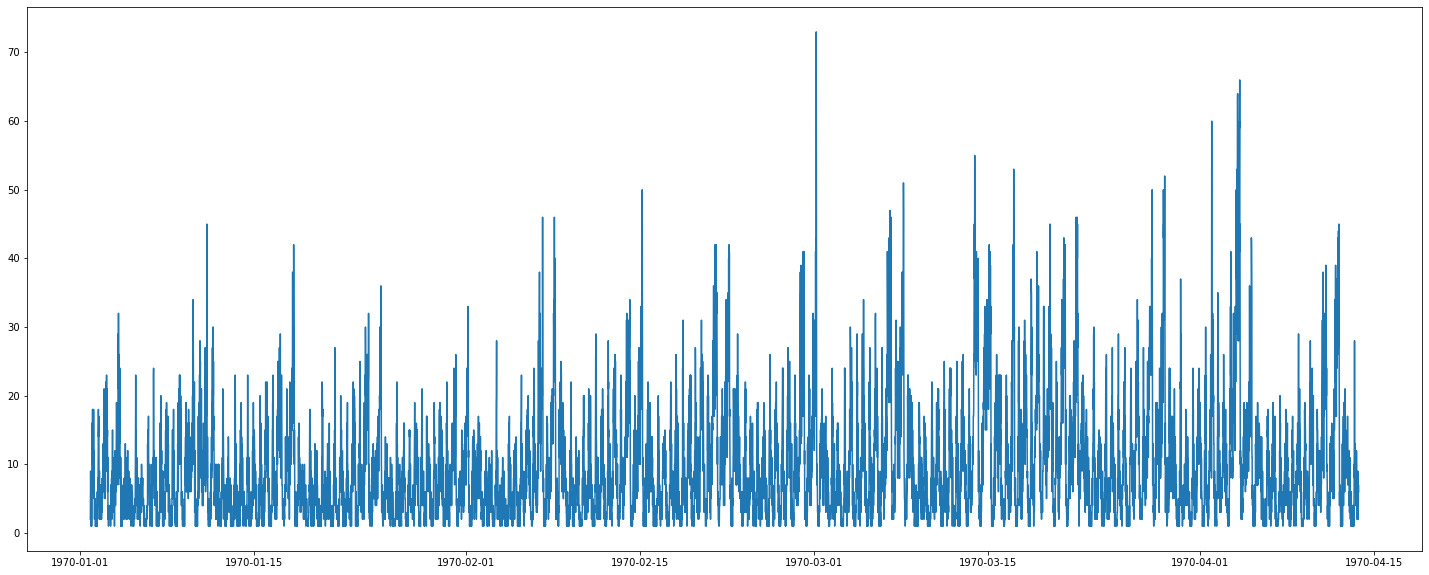

In [5]:
_ = plt.figure(figsize=[25, 10])
_ = plt.plot(logins_15mins)

In [6]:
extended_logins = logins_15mins.reset_index()

extended_logins.interval_15min = pd.to_datetime(extended_logins.interval_15min)

extended_logins['day'] = extended_logins.interval_15min.dt.day
extended_logins['month'] = extended_logins.interval_15min.dt.month
extended_logins['hour'] = extended_logins.interval_15min.dt.hour
extended_logins['week'] = extended_logins.interval_15min.dt.isocalendar().week
extended_logins['weekday'] = extended_logins.interval_15min.dt.weekday

extended_logins.set_index('interval_15min', inplace=True)

extended_logins.head()

,count,day,month,hour,week,weekday
interval_15min,,,,,,
1970-01-01 20:00:00,2,1,1,20,1,3
1970-01-01 20:15:00,6,1,1,20,1,3
1970-01-01 20:30:00,9,1,1,20,1,3
1970-01-01 20:45:00,7,1,1,20,1,3
1970-01-01 21:00:00,1,1,1,21,1,3


In [7]:
months = ['January', 'Febuary', 'March', 'April']
weekdays = ['Monday', "Tueday", 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
extended_logins.weekday.replace([0, 1, 2, 3, 4, 5, 6], weekdays, inplace=True)
extended_logins.month.replace([1, 2, 3, 4], months, inplace=True)
extended_logins.head()

,count,day,month,hour,week,weekday
interval_15min,,,,,,
1970-01-01 20:00:00,2,1,January,20,1,Thursday
1970-01-01 20:15:00,6,1,January,20,1,Thursday
1970-01-01 20:30:00,9,1,January,20,1,Thursday
1970-01-01 20:45:00,7,1,January,20,1,Thursday
1970-01-01 21:00:00,1,1,January,21,1,Thursday


In [8]:
extended_logins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9381 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   count    9381 non-null   int64 
 1   day      9381 non-null   int64 
 2   month    9381 non-null   object
 3   hour     9381 non-null   int64 
 4   week     9381 non-null   UInt32
 5   weekday  9381 non-null   object
dtypes: UInt32(1), int64(3), object(2)
memory usage: 485.5+ KB


In [9]:
logins_by_day = extended_logins.groupby(by='day')['count'].sum()
logins_by_month = extended_logins.groupby(by='month')['count'].sum().sort_values()
logins_by_hour = extended_logins.groupby(by='hour')['count'].sum()
logins_by_week = extended_logins.groupby(by='week')['count'].sum()
logins_by_weekday = extended_logins.groupby(by='weekday')['count'].sum().sort_values()

logins_by_day, logins_by_month, logins_by_hour, logins_by_week, logins_by_weekday

(day
 1     3194
 2     3044
 3     3475
 4     4037
 5     3223
 6     3281
 7     4006
 8     4019
 9     2832
 10    3297
 11    3863
 12    3614
 13    3021
 14    3426
 15    3331
 16    2215
 17    3044
 18    2945
 19    2859
 20    2885
 21    3487
 22    3507
 23    2233
 24    2318
 25    2348
 26    2176
 27    2735
 28    3540
 29    2197
 30    1415
 31    1575
 Name: count, dtype: int64,
 month
 April      13507
 January    21239
 Febuary    24673
 March      33723
 Name: count, dtype: int64,
 hour
 0     5993
 1     6317
 2     5800
 3     4831
 4     5034
 5     2945
 6     1138
 7      815
 8      818
 9     1527
 10    3064
 11    5799
 12    4964
 13    3611
 14    3426
 15    3038
 16    2832
 17    2584
 18    2980
 19    3235
 20    4103
 21    5623
 22    6607
 23    6058
 Name: count, dtype: int64,
 week
 1     2374
 2     5217
 3     5023
 4     4751
 5     4744
 6     5572
 7     5915
 8     7035
 9     6554
 10    7398
 11    7338
 12    8955
 13    7285
 14 

# Logins By Day

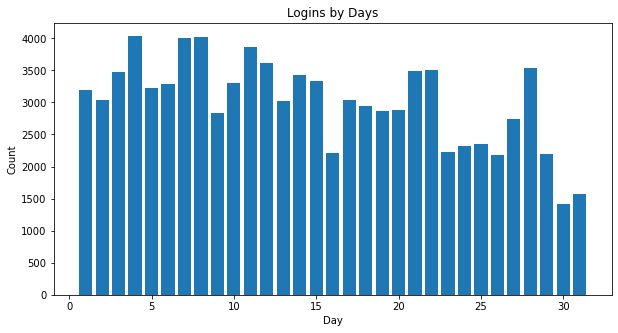

In [10]:
_ = plt.figure(figsize=[10, 5])
_ = plt.bar(logins_by_day.index, logins_by_day)
_ = plt.title('Logins by Days')
_ = plt.xlabel('Day')
_ = plt.ylabel('Count')

# Logins By Month

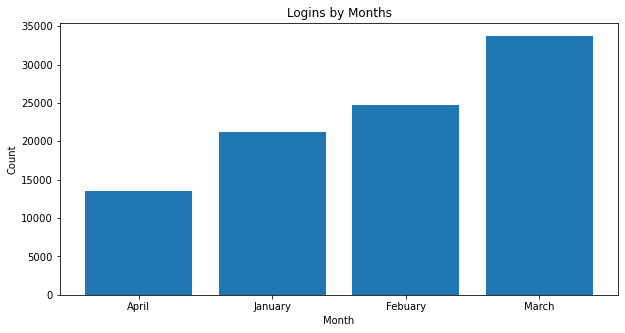

In [11]:
_ = plt.figure(figsize=[10, 5])
_ = plt.bar(logins_by_month.index, logins_by_month)
_ = plt.title('Logins by Months')
_ = plt.xlabel('Month')
_ = plt.ylabel('Count')

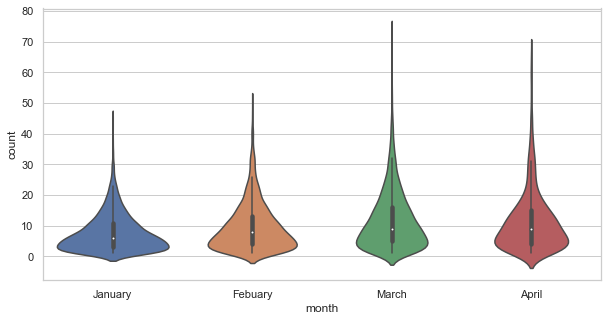

In [12]:
sns.set_theme(style="whitegrid")
_ = plt.figure(figsize=[10, 5])

_ = sns.violinplot(x='month', y='count', data=extended_logins)

# Logins By Hour

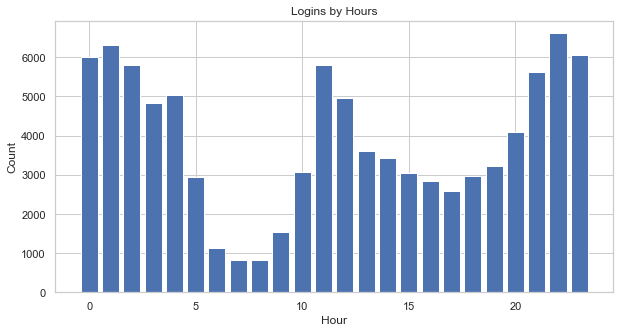

In [13]:
_ = plt.figure(figsize=[10, 5])
_ = plt.bar(logins_by_hour.index, logins_by_hour)
_ = plt.title('Logins by Hours')
_ = plt.xlabel('Hour')
_ = plt.ylabel('Count')

# Logins By Week

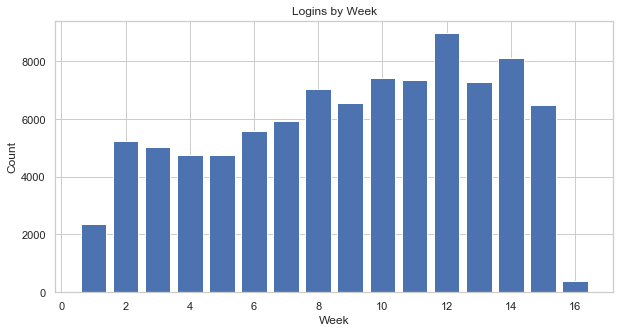

In [14]:
_ = plt.figure(figsize=[10, 5])
_ = plt.bar(logins_by_week.index, logins_by_week)
_ = plt.title('Logins by Week')
_ = plt.xlabel('Week')
_ = plt.ylabel('Count')

# Logins By Week Day

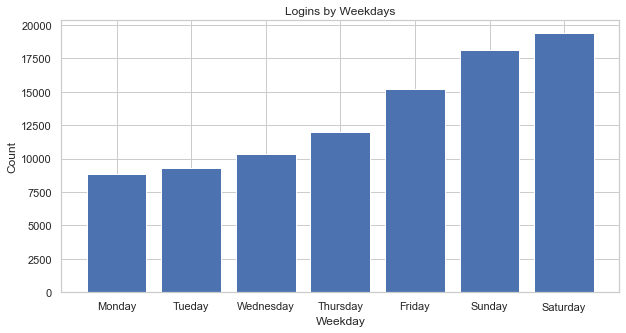

In [15]:
_ = plt.figure(figsize=[10, 5])
_ = plt.bar(logins_by_weekday.index, logins_by_weekday)
_ = plt.title('Logins by Weekdays')
_ = plt.xlabel('Weekday')
_ = plt.ylabel('Count')

# Takeaways

Biggest Takeaways:

1. The most logins occur on the weekends with Saturday having the most logins by day over the 4 month period.
2. Logins were most frequent between the hours of 9pm-3am.
3. March the most logins by about 10,000 with Feburary having the second most logins

The reason I think these were the biggest takeaways is because a lot of people go out on the weekends and people who are drinking are not going to drive since it is reckless thus they will call for a ride increasing the amount of logins on the weekends. 

# Part 2 - Experiment and metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.


# Answer

1. The metrics I would choose to measure the success of the experiment would be the distance and cost per ride. If there is a significant increase in the payout that the drivers get to traveling between cities compared to being exclusive to one city I feel that drivers would be more inclined to want to drive between cities. Although getting reimbursed for all toll costs is a good incentive for the drivers I feel that some drivers still might just be exclusive to the city they are in if the payout for traveling between cities is not worth it to them. Also, drivers driving the distances between the two cities will have to pay for gas more often so they will want to know that they will be getting paid enough to cover that. With that being said if the distance and cost per ride increase it will show how succesful the experiment was. 


2. I will collect data on all the rides that are happening and keep track of the ditance, cost, starting location, end location, date, toll cost, toll(if they went throuhgh a toll). I will then split the data up into rides that were between cities and rides that were within one city. Then I will calculate averages for cost and distance and also find out the average cost per mile of each ride (cost / distance). I will preform two sample t-test, chi-squared test, and null hypthesis test to find the signficance of my oberservations. I will interpret my results by creating graphs to show the difference in costs and distance between rides between both cities and rides within one city. Then present my findings in powerpoint form.  

# Part 3 - Predictive Modeling

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).



In [16]:
udc_df = pd.read_json('ultimate_data_challenge.json')
udc_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [17]:
udc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [18]:
udc_df.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [19]:
udc_df[udc_df['avg_rating_by_driver'].isna()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
90,Winterfell,1,2014-01-10,5.0,1.0,2014-02-09,iPhone,0.0,False,0.0,6.28,NaN
274,Astapor,1,2014-01-25,2.0,4.0,2014-02-09,iPhone,100.0,False,0.0,6.00,NaN
277,Winterfell,1,2014-01-25,NaN,1.0,2014-01-26,iPhone,0.0,False,0.0,1.82,NaN
536,Winterfell,1,2014-01-18,5.0,1.0,2014-02-08,Android,0.0,False,100.0,1.41,NaN
857,Winterfell,0,2014-01-11,4.0,1.0,2014-03-16,iPhone,0.0,False,0.0,0.42,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
49249,King's Landing,0,2014-01-14,5.0,1.0,2014-06-19,iPhone,0.0,True,100.0,4.60,NaN
49376,Astapor,1,2014-01-20,4.0,1.0,2014-01-24,iPhone,0.0,False,100.0,3.01,NaN
49504,Winterfell,2,2014-01-24,5.0,1.0,2014-01-25,Android,0.0,False,100.0,0.75,NaN
49599,King's Landing,1,2014-01-14,5.0,1.0,2014-02-08,iPhone,0.0,False,100.0,2.48,NaN


In [20]:
udc_df['avg_rating_of_driver'] = udc_df.avg_rating_of_driver.fillna(udc_df['avg_rating_of_driver'].mean())
udc_df['avg_rating_by_driver'] = udc_df.avg_rating_by_driver.fillna(udc_df['avg_rating_by_driver'].mean())
udc_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [21]:
udc_df['signup_date'] = pd.to_datetime(udc_df['signup_date'])
udc_df['last_trip_date'] = pd.to_datetime(udc_df['last_trip_date'])
udc_df.dropna(subset=['phone'], inplace=True)
udc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [22]:
def create_displot(feat):
    _ = sns.displot(data=udc_df[feat], height=5, aspect=2)
    print(f'Mean: {udc_df[feat].mean()}')

Mean: 4.777862174880759


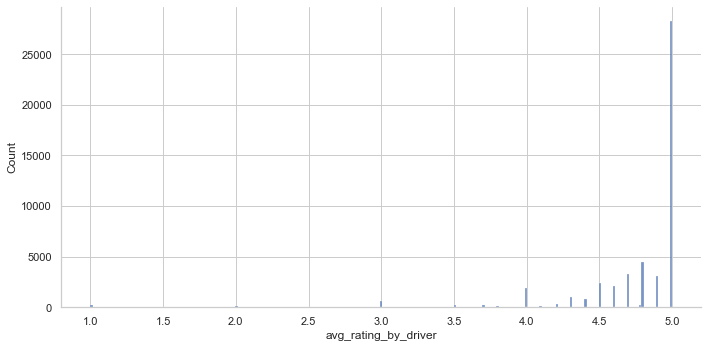

In [23]:
create_displot('avg_rating_by_driver')

Mean: 4.601482035153428


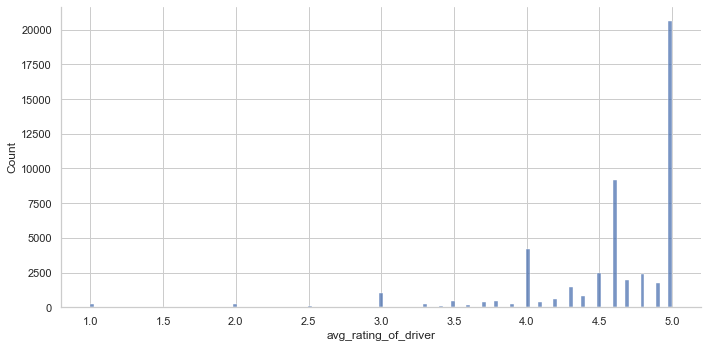

In [24]:
create_displot('avg_rating_of_driver')

Mean: 5.785418313039251


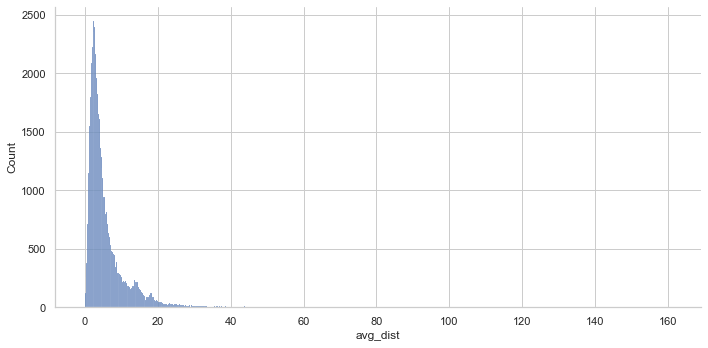

In [25]:
create_displot('avg_dist')

In [26]:
def graph_cats(feat):
    _ = sns.barplot(x=udc_df[feat].value_counts().index, y=udc_df[feat].value_counts())
    print(udc_df[feat].value_counts())

Winterfell        23125
Astapor           16413
King's Landing    10066
Name: city, dtype: int64


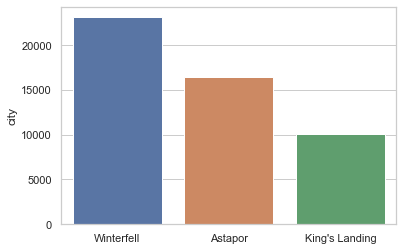

In [27]:
graph_cats('city')

False    30992
True     18612
Name: ultimate_black_user, dtype: int64


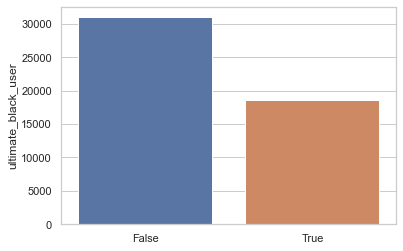

In [28]:
graph_cats('ultimate_black_user')

iPhone     34582
Android    15022
Name: phone, dtype: int64


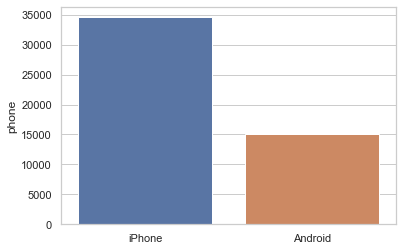

In [29]:
graph_cats('phone')

In [31]:
from datetime import datetime
from matplotlib.dates import date2num

Text(0.5, 1.0, 'Users last time riding')

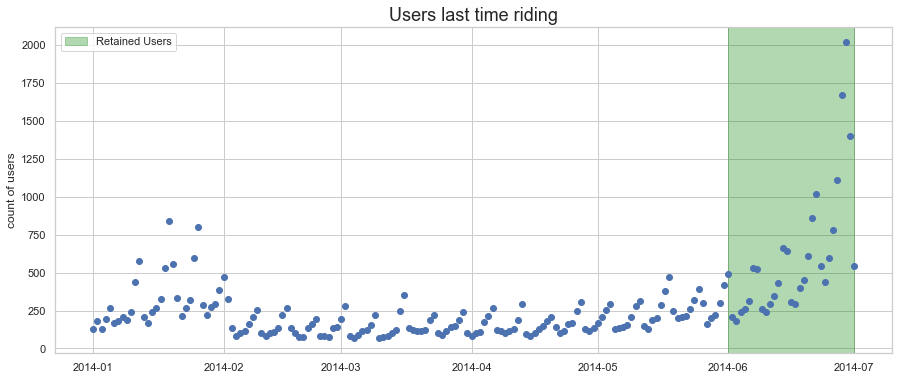

In [32]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(udc_df['last_trip_date'].value_counts().index, udc_df['last_trip_date'].value_counts(), linestyle='none', marker='o')
ax.axvspan(date2num(datetime(2014,6,1)), date2num(datetime(2014,7,1)), 
           label="Retained Users",color="green", alpha=0.3)
ax.legend()
ax.set_ylabel('count of users')
ax.set_title('Users last time riding', size=18)


In [33]:
udc_df.last_trip_date.sort_values(ascending=False)

6356    2014-07-01
9491    2014-07-01
37021   2014-07-01
9439    2014-07-01
42346   2014-07-01
           ...    
16377   2014-01-01
36165   2014-01-01
35603   2014-01-01
7156    2014-01-01
38673   2014-01-01
Name: last_trip_date, Length: 49604, dtype: datetime64[ns]

In [34]:
retained = udc_df[udc_df['last_trip_date'] > '2014-06-01']

percent_retained = len(retained) / len(udc_df)
print(f'Out of the {len(udc_df)} users, {round(percent_retained *100, 2)}% of them were retained.')

Out of the 49604 users, 36.65% of them were retained.


In [35]:
udc_df['retained'] = np.where(udc_df['last_trip_date'] > '2014-06-01', 1, 0)
udc_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


# Modeling

In [36]:
udc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
 12  retained                49604 non-null  int32 

In [37]:
numeric_values = udc_df.select_dtypes(include=['float64'])
numeric_values.head()

,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
0,4.7,1.10,15.4,46.2,3.67,5.0
1,5.0,1.00,0.0,50.0,8.26,5.0
2,4.3,1.00,0.0,100.0,0.77,5.0
3,4.6,1.14,20.0,80.0,2.36,4.9
4,4.4,1.19,11.8,82.4,3.13,4.9


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [39]:
y = udc_df.retained
X = numeric_values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression


In [41]:
params = [0.001, 0.01, 0.1, 1, 10, 100]

accuracies = {}

for i in params:
    lr = LogisticRegression(C= i, random_state= 42)
    lr.fit(X_train, y_train)
    
    y_lr_pred = lr.predict(X_test)
    
    acc_score = accuracy_score(y_test, y_lr_pred)
    accuracies[i] = acc_score
accuracies

{0.001: 0.6393839206515604,
 0.01: 0.6395451979679058,
 0.1: 0.6380937021207967,
 1: 0.638013063462624,
 10: 0.638013063462624,
 100: 0.638013063462624}

In [42]:
lr2 = LogisticRegression(C=0.01)
lr2.fit(X_train, y_train)
lr_matrix = confusion_matrix(y_test, y_lr_pred)
print(lr_matrix)
lr_accuracy = lr2.score(X_test, y_test)
print(lr_accuracy)
print(classification_report(y_test, y_lr_pred))

[[7911   23]
 [4466    1]]
0.6395451979679058
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      7934
           1       0.04      0.00      0.00      4467

    accuracy                           0.64     12401
   macro avg       0.34      0.50      0.39     12401
weighted avg       0.42      0.64      0.50     12401



# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
estimators = [10, 25, 50, 75, 100]

rf_scores = {}

for i in estimators:
    rf = RandomForestClassifier(n_estimators=i, criterion='entropy', random_state=42 )
    rf.fit(X_train, y_train)
    
    y_rf_predict = rf.predict(X_test)
    
    acc_rf_score = accuracy_score(y_test, y_rf_predict)
    rf_scores[i] = acc_rf_score
rf_scores

{10: 0.6986533344085154,
 25: 0.7017176034190791,
 50: 0.7051850657205064,
 75: 0.70647528425127,
 100: 0.70647528425127}

In [45]:
rf2 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf2.fit(X_train, y_train)
rf_matrix = confusion_matrix(y_test, y_rf_predict)
print(rf_matrix)

rf_accuracy = rf2.score(X_test, y_test)
print(rf_accuracy)

print(classification_report(y_test, y_rf_predict))

[[6179 1755]
 [1885 2582]]
0.70647528425127
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      7934
           1       0.60      0.58      0.59      4467

    accuracy                           0.71     12401
   macro avg       0.68      0.68      0.68     12401
weighted avg       0.70      0.71      0.71     12401



# Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_gb_predict = gb.predict(X_test)

gb_matrix = confusion_matrix(y_test, y_gb_predict)
print(gb_matrix)

gb_accuracy = gb.score(X_test, y_test)
print(gb_accuracy)

print(classification_report(y_test, y_gb_predict))

[[6782 1152]
 [1964 2503]]
0.7487299411337796
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      7934
           1       0.68      0.56      0.62      4467

    accuracy                           0.75     12401
   macro avg       0.73      0.71      0.71     12401
weighted avg       0.74      0.75      0.74     12401



# Parameter Tuning Gradient Boosting

In [48]:
from sklearn.model_selection import GridSearchCV

In [250]:
gb = GradientBoostingClassifier()
param_grid_gb = {'loss': ['deviance', 'exponential'], 'learning_rate':[0.05, 0.1, 0.25, 0.5, 0.75, 1], 'n_estimators':[100, 150, 200, 250], 
                'min_samples_split': [2, 5, 8, 10], 'max_depth':[3, 6, 9]}

gb_gs = GridSearchCV(gb, param_grid=param_grid_gb, cv=5, scoring='accuracy')
gb_gs.fit(X_train, y_train)
 
print(gb_gs.best_estimator_)
print(gb_gs.best_score_)

GradientBoostingClassifier(learning_rate=0.05, max_depth=6, min_samples_split=5,
                           n_estimators=200)
0.7537833032038416


In [49]:
gb_Final = GradientBoostingClassifier(learning_rate=0.05, max_depth=6, loss='exponential', min_samples_split=5, n_estimators=200)
gb_Final.fit(X_train, y_train)

y_gb_finalpredict = gb_Final.predict(X_test)

gb_finalacc = accuracy_score(y_test, y_gb_finalpredict)

print(classification_report(y_test, y_gb_finalpredict))

print(gb_finalacc)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      7934
           1       0.70      0.56      0.62      4467

    accuracy                           0.75     12401
   macro avg       0.74      0.71      0.72     12401
weighted avg       0.75      0.75      0.75     12401

0.7549391178130795


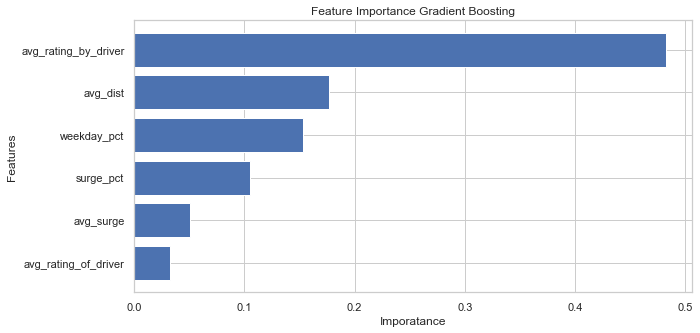

In [50]:
features = X
importances = list(gb_Final.feature_importances_)
sort_import = np.sort(importances)

plt.figure(figsize=(10, 5))
index = [0,1,2, 3, 4, 5]
_ = plt.barh(index, sort_import, align='center')
plt.xlabel('Imporatance')
plt.yticks(index, features)
plt.ylabel('Features')
plt.title('Feature Importance Gradient Boosting')
plt.show()

In [51]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

y_gb_score = gb_Final.predict_proba(X_test)
y_gb_score = y_gb_score[:,1]

auroc_gb = roc_auc_score(y_test, y_gb_score)
print("ROC-AUC Score for Gradient Boosting:", auroc_gb)

ROC-AUC Score for Gradient Boosting: 0.778378063505677


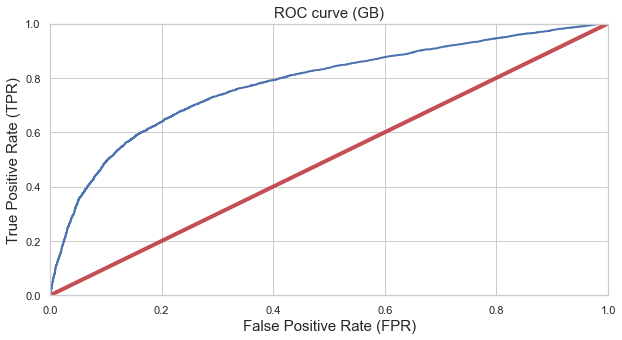

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, y_gb_score)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (GB)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(fpr, tpr)
plt.show()

I preformed a Logistic Regression Model, Random Forest Model, and Gradient Boosting. Logistic Regression had an accuracy of 0.64, Random Forest had an accuracy of, 0.71, and Gradient Boosting preformed the best out of the three with an accuracy score of 0.75 so I choose to use Gradient Boosting further. After tuning the parameters for Gradient Boosting it had an accuracy score of 0.75 and the AUC score was 0.79. After parameter tuning I looked at the feature imporatance and found that avg_rating_by_driver, avg_distance and weekday_percentage were the three most important features. 

# Recommendations for Ultimate

In order to improve long term rider retention I would recommend that Ultimate makes sure it is able to retain drivers with higher ratings since it was the most important feature and I believe this is so because the riders feel more safe with drivers who have high ratings. Next, I would recommend that Ulitmate tries ways to encourage riders to take longer rides since the average distance was the second most imporant feature. Lastly, having riders take more trips during the weekdays whether that be lowering fares during the weekday or encouraging people to use Ultimate to get to work could be some ideas Ultimate could try to implement.  